In [26]:
import lsst.daf.persistence as dafPersist
from lsst.ip.diffim import GetCoaddAsTemplateTask, GetCalexpAsTemplateTask
import lsst.afw.display.ds9 as ds9
import lsst.afw.geom as afwGeom
import lsst.meas.algorithms.detection as sDet
import lsst.afw.image as afwImage
import matplotlib.pyplot as plt
import numpy as np

In [27]:
DATADIR="/renoir_data_02/jpreyes/lsst_data/CFHTLS_master/"
butler = dafPersist.Butler(DATADIR+"/output")
DATA_ID={'visit': 850586 , 'filter':'r' , 'ccd':14}

In [28]:
calexp=butler.get('calexp', DATA_ID)

In [29]:
image = calexp.getMaskedImage().getImage()
image_array = image.getArray()

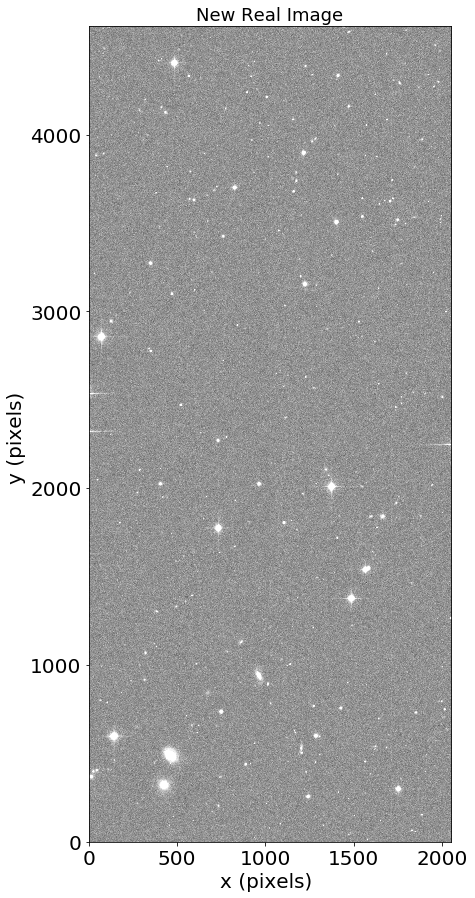

In [30]:
%matplotlib inline
fig = plt.figure(figsize = (15,15))
plt.imshow(image_array, vmin= image_array.mean()-image_array.std(), vmax=image_array.mean()+image_array.std(), cmap = 'Greys_r', origin='lower')
plt.title('New Real Image', fontsize=18)
plt.xlabel("x (pixels) ", fontsize=20)
plt.ylabel("y (pixels) ", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

In [31]:
y_max,x_max = image_array.shape
x_max = x_max/2
image_reshaped = np.zeros((x_max,x_max)) 

for i in range(x_max):
    image_reshaped[i,:] = image_array[x_max*3+i,x_max:x_max*2]
    

In [32]:
print x_max, y_max

1024 4612


In [33]:
y_max,x_max = image_array.shape
x_max = x_max/2

bboxT = afwGeom.Box2I(afwGeom.Point2I(x_max, x_max*3),afwGeom.Point2I(x_max*2 - 1, x_max*4 )) 




result = calexp.Factory(calexp,bboxT, True)

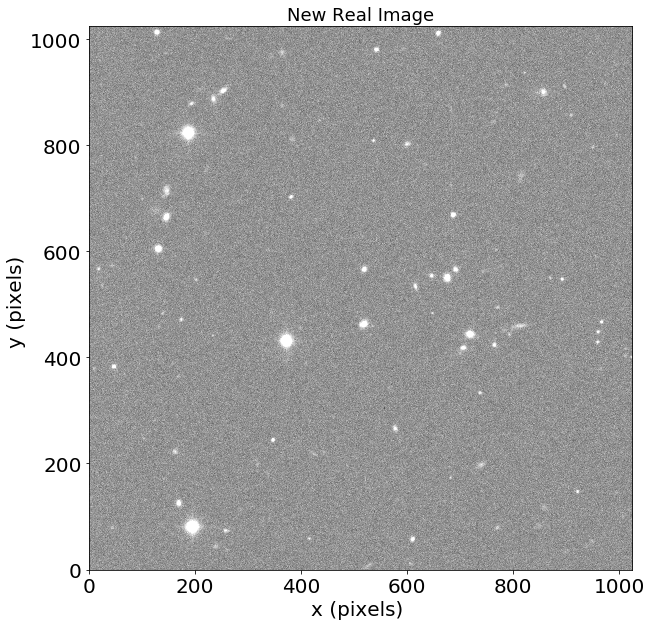

In [34]:
image_r = result.getMaskedImage().getImage()
image_r_array = image_r.getArray()

fig = plt.figure(figsize = (10,10))
plt.imshow(image_r_array, vmin= image_r_array.mean()-image_r_array.std(), vmax=image_r_array.mean()+image_r_array.std(), cmap = 'Greys_r', origin='lower')
plt.title('New Real Image', fontsize=18)
plt.xlabel("x (pixels) ", fontsize=20)
plt.ylabel("y (pixels) ", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

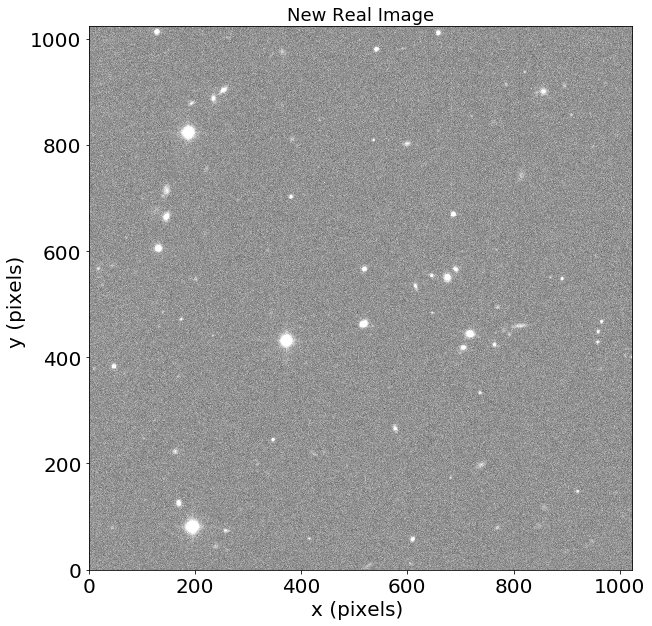

In [35]:
fig = plt.figure(figsize = (10,10))
plt.imshow(image_reshaped, vmin= image_reshaped.mean()-image_reshaped.std(), vmax=image_reshaped.mean()+image_reshaped.std(), cmap = 'Greys_r', origin='lower')
plt.title('New Real Image', fontsize=18)
plt.xlabel("x (pixels) ", fontsize=20)
plt.ylabel("y (pixels) ", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

In [36]:
psf = calexp.getPsf()
shape = psf.computeShape()
sigma= shape.getDeterminantRadius()
print sigma

1.60754685434


In [37]:
from lsst.meas.algorithms.installGaussianPsf import InstallGaussianPsfTask

In [59]:
iPsf = InstallGaussianPsfTask()

bgConf = sDet.BackgroundConfig()
background,result = sDet.estimateBackground(result,bgConf,True)

iPsf.run(exposure=result)

In [60]:
psf = result.getPsf()
shape = psf.computeShape()
sigma= shape.getDeterminantRadius()
print sigma

1.60748326513


In [61]:
psf = calexp.getPsf()
shape = psf.computeShape()
sigma= shape.getDeterminantRadius()
print sigma

1.60754685434


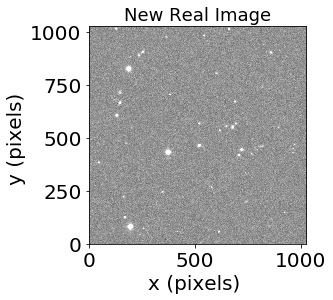

In [66]:
i_o = result.getMaskedImage().getImage().getArray()
plt.imshow(i_o, vmin= i_o.mean()-i_o.std(), vmax=i_o.mean()+i_o.std(), cmap = 'Greys_r', origin='lower')
plt.title('New Real Image', fontsize=18)
plt.xlabel("x (pixels) ", fontsize=20)
plt.ylabel("y (pixels) ", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

In [57]:
shape.

<Swig Object of type 'lsst::afw::geom::ellipses::Quadrupole::Matrix *' at 0x7f421c8acbd0>